# MuscleHub AB Test

## 1. SQL

Like most businesses, Janet keeps her data in a SQL database.  Normally, would download the data from a database to a csv file, and then load it into a Jupyter Notebook using Pandas.

For this project, we'll have to access SQL by using a special Codecademy library that lets us type SQL queries directly into this Jupyter notebook.  Will pass each SQL query as an argument to a function called `sql_query`.  Each query will return a Pandas DataFrame.
<br> Project from https://www.codecademy.com/paths/data-science/tracks/data-analysis-capstone-projects/modules/data-analysis-capstone-projects/informationals/ida-capstone-musclehub 

In [1]:
# Importing the codecademy SQL library allowing to type SQL queries
from codecademySQL import sql_query

Janet of MuscleHub has a SQLite database, which contains several tables:
- `visits` contains information about potential gym customers who have visited MuscleHub
- `fitness_tests` contains information about potential customers in "Group A", who were given a fitness test
- `applications` contains information about any potential customers (both "Group A" and "Group B") who filled out an application.  Not everyone in `visits` will have filled out an application.
- `purchases` contains information about customers who purchased a membership to MuscleHub.

In [2]:
# Will examine each table below

In [3]:
# Examining visits table
sql_query('''
SELECT *
FROM visits
LIMIT 5''')

,index,first_name,last_name,email,gender,visit_date
0,0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [4]:
# Examining fitness_tests table
sql_query('''
SELECT *
FROM fitness_tests
LIMIT 5'''
)

,index,first_name,last_name,email,gender,fitness_test_date
0,0,Kim,Walter,KimWalter58@gmail.com,female,2017-07-03
1,1,Tom,Webster,TW3857@gmail.com,male,2017-07-02
2,2,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-01
3,3,Roberta,Best,RB6305@hotmail.com,female,2017-07-02
4,4,Carrie,Francis,CF1896@hotmail.com,female,2017-07-05


In [5]:
# Examining applications table
sql_query('''
SELECT * 
FROM applications
LIMIT 5 
''')

,index,first_name,last_name,email,gender,application_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-12
1,1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,2017-09-29
2,2,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-15
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-26
4,4,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-14


In [6]:
# Examining purchases table
sql_query('''
SELECT *
FROM purchases 
LIMIT 5'''
)

,index,first_name,last_name,email,gender,purchase_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16
2,2,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-20
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-27
4,4,Dawn,Adkins,Dawn.Adkins@gmail.com,female,2017-08-24


In [7]:
# Goal: creating an entire DataFrame containing all of this data in order to perform the A/B test

In [8]:
# 1. Pulling data where visit date is on or after 7-1-17 
# Left joining the four tables together on first_name, last_name and email. 
# Additionally, selecting the necessary columns: 
# first_name, last_name. gender, email, visit_date, fitness_test_date, application_date, purchase_date

In [9]:
df = sql_query('''
SELECT visits.first_name,
visits.last_name, 
visits.gender, 
visits.email, 
visits.visit_date,
fitness_tests.fitness_test_date, 
applications.application_date,
purchases.purchase_date
FROM visits 
LEFT JOIN fitness_tests
    ON visits.first_name = fitness_tests.first_name
    AND visits.last_name = fitness_tests.last_name
    AND visits.email = fitness_tests.email
LEFT JOIN applications
    ON visits.first_name = applications.first_name
    AND visits.last_name = applications.last_name
    AND visits.email = applications.email
LEFT JOIN purchases
    ON visits.first_name = purchases.first_name
    AND visits.last_name = purchases.last_name
    AND visits.email = purchases.email
WHERE visit_date >= '7-1-17'
''')



## 2. A/B Test

In [10]:
# Importing the necessary modules
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
# Verifying our DataFrame contains the length it should have 
print(len(df))

5004


In [12]:
# Creating an ab_test_group column based on whether the participant was scheduled a fitness_test (B) or not (A) 
df['ab_test_group'] = df['fitness_test_date'].apply(lambda x: 'A' if pd.notnull(x) else 'B')
# df[['fitness_test_date', 'ab_test_group']]
df.head()

,first_name,last_name,gender,email,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group
0,Kim,Walter,female,KimWalter58@gmail.com,7-1-17,2017-07-03,None,None,A
1,Tom,Webster,male,TW3857@gmail.com,7-1-17,2017-07-02,None,None,A
2,Edward,Bowen,male,Edward.Bowen@gmail.com,7-1-17,None,2017-07-04,2017-07-04,B
3,Marcus,Bauer,male,Marcus.Bauer@gmail.com,7-1-17,2017-07-01,2017-07-03,2017-07-05,A
4,Roberta,Best,female,RB6305@hotmail.com,7-1-17,2017-07-02,None,None,A


In [13]:
# Counting how many users are in each ab_test_group 
ab_counts = df.groupby('ab_test_group').first_name.count().reset_index()
ab_counts

,ab_test_group,first_name
0,A,2504
1,B,2500


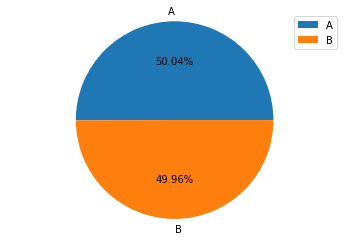

In [14]:
# Displaying this data in a pie chart
plt.pie(ab_counts['first_name'].values, labels=ab_counts['ab_test_group'].values, autopct='%0.2f%%')
plt.legend(ab_counts['ab_test_group'])
plt.axis('equal')

plt.savefig('ab_test_pie_chart.png')
plt.show()

In [15]:
# Determining how many people fill out an application 

In [16]:
df['is_application'] = df['application_date'].apply(lambda x: 'Application' if pd.notnull(x) else 'No Application')
# df['is_application'].head()

In [17]:
app_counts = df.groupby(['ab_test_group', 'is_application']).first_name.count().reset_index()
app_counts.head()

,ab_test_group,is_application,first_name
0,A,Application,250
1,A,No Application,2254
2,B,Application,325
3,B,No Application,2175


In [18]:
# Calculating percentage of people filling out an application 
app_pivot = app_counts.pivot(columns='is_application',
                            index='ab_test_group', 
                            values='first_name').reset_index()
app_pivot

is_application,ab_test_group,Application,No Application
0,A,250,2254
1,B,325,2175


In [19]:
app_pivot['Total'] = app_pivot['Application'] + app_pivot['No Application']
app_pivot

is_application,ab_test_group,Application,No Application,Total
0,A,250,2254,2504
1,B,325,2175,2500


In [20]:
app_pivot['Percent with Application'] = app_pivot['Application'] / app_pivot['Total']
app_pivot

is_application,ab_test_group,Application,No Application,Total,Percent with Application
0,A,250,2254,2504,0.09984
1,B,325,2175,2500,0.13000


It looks like more people from Group B turned in an application. <br>
Will check if the difference is statistically significan using chi-squared test. 


In [21]:
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency([[250,2254], [325,2175]])
pval

0.0009647827600722304

P-value is below 5%, the difference is significant. <br>More people from Group B turned in an application, which highlights that if participants had a fitness test, they are more likely to fill out an application than those who don't.

In [22]:
# Determining who purchased a membership based on those who picked up an application
df['is_member'] = df['purchase_date'].apply(lambda x: 'Member' if pd.notnull(x) else 'Not Member')
# df['is_member']

In [23]:
just_apps = df[df['is_application'] == 'Application'].reset_index()
just_apps

,index,first_name,last_name,gender,email,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,is_application,is_member
0,2,Edward,Bowen,male,Edward.Bowen@gmail.com,7-1-17,None,2017-07-04,2017-07-04,B,Application,Member
1,3,Marcus,Bauer,male,Marcus.Bauer@gmail.com,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,Application,Member
2,9,Salvador,Cardenas,male,SCardenas1980@gmail.com,7-1-17,2017-07-07,2017-07-06,None,A,Application,Not Member
3,11,Valerie,Munoz,female,VMunoz1998@gmail.com,7-1-17,2017-07-03,2017-07-05,2017-07-06,A,Application,Member
4,35,Michael,Burks,male,MB9820@gmail.com,7-1-17,None,2017-07-07,2017-07-13,B,Application,Member
...,...,...,...,...,...,...,...,...,...,...,...,...
570,4944,Frances,Kerr,female,FK7982@gmail.com,9-8-17,2017-09-12,2017-09-10,2017-09-15,A,Application,Member
571,4964,Raymond,Cantrell,male,Raymond.Cantrell@gmail.com,9-9-17,None,2017-09-13,2017-09-18,B,Application,Member
572,4972,Roberta,Acevedo,female,RA8063@gmail.com,9-9-17,None,2017-09-15,2017-09-16,B,Application,Member
573,4991,Suzanne,Humphrey,female,SuzanneHumphrey4@gmail.com,9-9-17,2017-09-09,2017-09-13,2017-09-18,A,Application,Member


In [24]:
member_counts = just_apps.groupby(['is_member', 'ab_test_group']).first_name.count().reset_index()
member_counts
member_pivot = member_counts.pivot(columns='is_member',
                                  index='ab_test_group',
                                  values='first_name').reset_index()
member_pivot['Total'] = member_pivot['Member'] + member_pivot['Not Member']
member_pivot['Percent Purchase'] = member_pivot['Member'] / member_pivot['Total']
member_pivot

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,50,250,0.800000
1,B,250,75,325,0.769231


It looks like people who took the fitness test were more likely to purchase a membership **if** they picked up an application. 
<br>Verifying if this difference is statistically significant. 

In [25]:
from scipy.stats import chi2_contingency
chi2, pval_members, dof, expected = chi2_contingency([[200, 50], [250, 75]])
pval_members

0.43258646051083327

P-value is well above 5%, the difference is not actually significant. People who took the fitness test are more likely to purchase a membership but whether or not they pick up an application does not have a significant impact.

In [26]:
# Defining final_member table showcasing percentage of people who purchased a membership out of all visitors. 
final_member = df.groupby(['is_member', 'ab_test_group']).first_name.count().reset_index()

final_member_pivot = final_member.pivot(columns='is_member',
                                       index='ab_test_group',
                                       values='first_name').reset_index()
final_member_pivot['Total'] = final_member_pivot['Member'] + final_member_pivot['Not Member']
final_member_pivot['Percent Purchase'] = final_member_pivot['Member'] / final_member_pivot['Total']
final_member_pivot

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,2304,2504,0.079872
1,B,250,2250,2500,0.100000


In [27]:
# Verifying if difference is significant 
final_contingency = [[200, 2304],[250, 2250]]
chi2, final_pval, dof, expected = chi2_contingency(final_contingency)
final_pval

0.014724114645783203

P-value is below 5%, there is a significant difference in the likelihood of purchasing a membership among all visitors between those who took a fitness test and those who didn't. 

### Summarizing the acquisition funel with charts

In [28]:
# Defining x and y for each chart 
app_x = range(len(app_pivot['Percent with Application']))
app_y = app_pivot['Percent with Application'].values

member_x = range(len(member_pivot['Percent Purchase']))
member_y = member_pivot['Percent Purchase'].values

final_x = range(len(final_member_pivot['Percent Purchase']))
final_y = final_member_pivot['Percent Purchase'].values

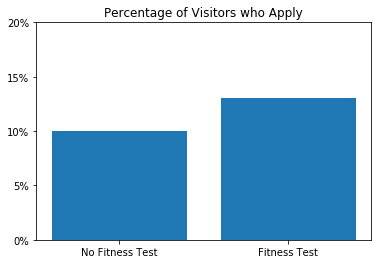

In [29]:
# Percent of visitors who applied
ax = plt.subplot()
plt.bar(app_x, app_y)
ax.set_xticks(app_x)
ax.set_xticklabels(['No Fitness Test', 'Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
ax.set_title('Percentage of Visitors who Apply')
plt.show()

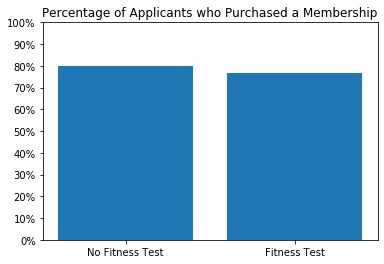

In [30]:
# Percent of Applicants who Purchased a Membership
ax = plt.subplot()
plt.bar(member_x, member_y)
ax.set_xticks(member_x)
ax.set_xticklabels(['No Fitness Test', 'Fitness Test'])

ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
ax.set_title('Percentage of Applicants who Purchased a Membership')
plt.show()

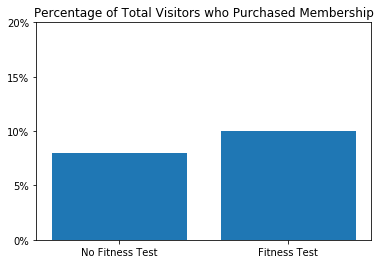

In [31]:
# Percent of Total Visitors who Purchased Membership
ax = plt.subplot()
plt.bar(final_x, final_y)

ax.set_xticks(final_x)
ax.set_xticklabels(['No Fitness Test', 'Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
ax.set_title('Percentage of Total Visitors who Purchased Membership')
plt.show()